In [208]:
%matplotlib inline
import numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3,3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [209]:
#estos son los valores a predecir
a = 10
b = 15
c = 3

In [210]:
a_guess = 20
b_guess = 3
c_guess = 12

n = 60
x = random(n)

In [223]:
def lin(a,b,c,x):
    return a*(x**3) + b*x**2 + c

In [224]:
y = lin(a,b,c,x)

In [225]:
def sse(y,y_pred):
    return ((y-y_pred)**2).sum()

def loss(y,a,b,c,x):
    return sse(y, lin(a,b,c,x))

def avg_loss(y,a,b,c,x):
    return np.sqrt(loss(y,a,b,c,x)/n)

In [226]:
y

array([ 13.5178,   7.1893,   4.6269,  12.3834,  11.0971,  11.8907,  10.6493,   3.2207,  10.1831,
         4.6782,  20.3044,  24.5696,   4.8611,   6.3454,   8.7928,  23.255 ,   4.9508,  18.7804,
         4.8038,   6.1686,  10.0616,   4.0581,  17.0381,   3.    ,   3.6648,   3.6662,   8.9202,
         3.6631,   3.0447,  24.8485,  10.3043,   4.9376,   7.4808,   3.005 ,  13.2154,   7.8069,
        12.4957,  20.216 ,   9.9836,  12.0951,   7.4237,   3.1768,  11.9563,   3.5299,  27.4366,
         8.6028,   3.4012,  18.0057,   4.0212,   4.3492,   3.2275,  10.1229,   3.0371,   3.2086,
         3.3712,  10.6225,   3.0157,  20.5063,   5.1044,   3.6605])

In [227]:
avg_loss(y, a_guess, b_guess, c_guess, x)

7.6568

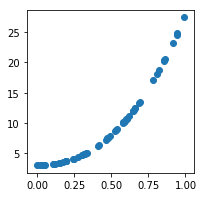

In [228]:
plt.scatter(x,y)

In [234]:
lr = 0.1
def update():
    global a_guess, b_guess, c_guess
    y_pred = lin(a_guess, b_guess, c_guess, x)
    dydc = 2 * (y_pred - y)
    dydb = x * dydc
    dyda = x**2 * dydc
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()
    c_guess -= lr*dydc.mean()
    

In [239]:

fig = plt.figure(dpi=100, figsize=(5,4))
plt.scatter(x,y)
line, = plt.plot(x, lin(a_guess, b_guess,c_guess, x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess,b_guess, c_guess,x))
    for i in range(2):
        update()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
ani

In [240]:
a_guess, b_guess, c_guess

(12.1002, 13.1445, 3.1060)